# Velkommen til SymPy!


SymPy er navnet på programmet som vil hjælpe udregninger og matematik i løbet af de næste semestre i 01005, Matematik 1. SymPy løber dette semester en prøveordning for retningerne Matematik og Teknologi samt Kunstig Intelligens og Data i stedet for programmet Maple. 

SymPy er en forkortelse for "Symbolic Python". Som navnet siger kører SymPy altså i programmeringssproget "Python". I Python findes pakken "SymPy" som tillader at programmeringssproget kan have symbolske variable og løse symbolske ligninger, som er krævet i løbet af kurset. Vi kommer også til at introducere andre pakker, hvis de bliver nødvendige. På trods af, at Python er et programmeringssprog, er det ikke tiltænkt at dette er en guide til programmering. Dog vil dette have de fleste, hvis ikke alle, værktøjer der er brug for til løsning og visualisering af matematiske problemstillinger i en både teoretisk, anvendt og ingeniørmæssig sammenhæng. 

SymPy importeres og gøres klar til at printe matematik ved de følgende to linjer, som vil befinde sig i toppen af alle følgende SymPy Demoer:

In [1]:
from sympy import *      # Vi importerer hele SymPy pakken
init_printing(use_latex='mathjax')          # Dette initialiserer pæn LaTeX output

## SymPy Demo

I løbet af dette og næste semester vil der være SymPy guides i samme format som dette dokument, i Jupyter Notebooks, kaldes SymPy demoer. De vil vise eksempler på værktøjer fra SymPy som kan bruges til at løse ugens grupperegningsopgaver og hjælpe med at løse de matematiske problemstillinger der introduceres i forelæsningerne. Demoerne vil ofte præsentere typiske opgaver og kort beskrive løsningsmetoderne samt matematikken bag dem. Løsningerne til typiske opgaver kommer i form af både "simuleret håndregning", indbyggede funktioner, der direkte løser opgaven, samt funktioner der bygges i løbet af disse demoer. Værktøjerne præsenteret til, og bygget op indtil, ugens demo burde være nok software-mæssigt til at løse ugens opgaver.

## Symbolske og Numeriske variable

Python (uden SymPy) er et programmeringssprog som regner numerisk. Dette betyder, at alle tal og variable skal repræsenteres ud fra endeligt mange 0'er og 1'er. Studiet af numerisk matematik i computere overlades til andre kurser, men det kan være rart at vide at Python nogle gange ikke gør som man havde forudset, med mindre man gør en aktiv handling.

Eksempelvis kan vi alle blive enige om, at

\begin{equation}
    0.3-(0.2+0.1) = 0.
\end{equation}

Alligevel er Python ikke altid enig i dette

In [2]:
0.3-(0.2+0.1)

-5.551115123125783e-17

Vi får ikke præcis $0.0$, og hvis vi spørger om det er lig med $0.0$ får vi

In [3]:
0 == 0.3-(0.2+0.1)

False

Vi skal altså passe på med altid at spørge om numeriske udtryk er lig med hinanden når vi regner med kommatal! 

Man løber dog ikke ind i lige så mange problemer, hvis man lader SymPy tage sig af matematikken! Hvis man om enten tælleren eller nævneren sætter "$\text{S(tal)}$", eller benytter "$\text{Rational(tæller, nævner)}$", regnes matematikken af SymPy (pakken til Python der regner symbolsk), som her giver det forventede svar:

In [4]:
Rational(3,10)-(S(2)/10 + 1/S(10))

0

og

In [5]:
Rational(3,10)-(S(2)/10 + S(1)/10) == 0

True

Vi vil også meget gerne have mulighed for at løse ligninger. For eksempel,

\begin{equation}
3\,x^2-x = 0.
\end{equation}

Ligninger som denne og meget mere kan løses ved brug af *symbolske variable* fra SymPy. En Python variabel kan laves symbolsk ved brug af kommandoen $\text{Symbol()}$ eller $\text{symbols()}$ der tager mindst ét argument, *'names'*. Man kan også give antagelser om variablen, blandt andet $x\in \mathbb{Z}$ ($\text{integer=True}$), $x\in \mathbb{C}$ ($\text{complex=True}$, dette er standard hvis intet skrives) eller $x\in \mathbb{R}$ ($\text{complex=False}$ eller $\text{real=True}$).

Her gives kort et par eksempler på hvordan disse variable kan bruges:

In [6]:
x = symbols('x', complex=True)
3*x**2-x

   2    
3⋅x  - x

In [7]:
l, p, t = symbols('lambda, phi, theta', real=True)
t**2 + sin(l)/tan(p)

 2   sin(λ)
θ  + ──────
     tan(φ)

In [8]:
x_list = symbols('x0:3')
x_list

(x₀, x₁, x₂)

Med symbolske udtryk kan vi også begynde at løse ligninger med $\text{solve()}$ eller (hellere) $\text{solveset()}$.

In [9]:
solveset(3*x**2-x)

{0, 1/3}

Bemærk at $3x^2 - x$ er et udtryk og ikke en ligning man kan "solve". Kaldes solve og solveset med et udtryk, vil Python løse den ligning hvor udtrykkene sættes lig med $0$, dvs. vi løser her $3x^2-x=0$. Ligninger som fx $a=b$ kan i Python skrives som $\text{Eq(a,b)}$. Dette er specielt nyttigt hvis højresiden ikke er nul. Fx:

In [10]:
my_equality = Eq(3*x**2-x, p+27)
my_equality

   2             
3⋅x  - x = φ + 27

Da ligningen har flere ubekendte (symboler), må vi fortælle med hensyn hvilke variable, Python skal løse ligningen:

In [11]:
solveset(my_equality, x)

⎧      ____________    ____________    ⎫
⎪1   ╲╱ 12⋅φ + 325   ╲╱ 12⋅φ + 325    1⎪
⎨─ - ──────────────, ────────────── + ─⎬
⎪6         6               6          6⎪
⎩                                      ⎭

## Funktioner og Plots

SymPy har også et stort bibliotek inden for både funktioner og plots. Her vises kort et par eksempler på dette,

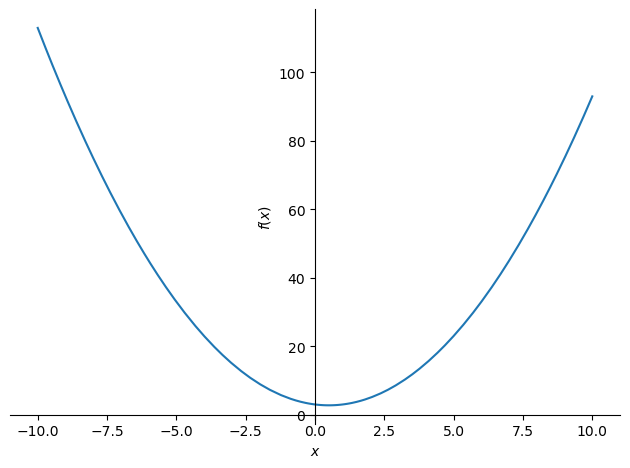

In [12]:
plot(x**2-x+3)

Eller hvis man vil bruge lidt mere tid på det, så det bliver flot:

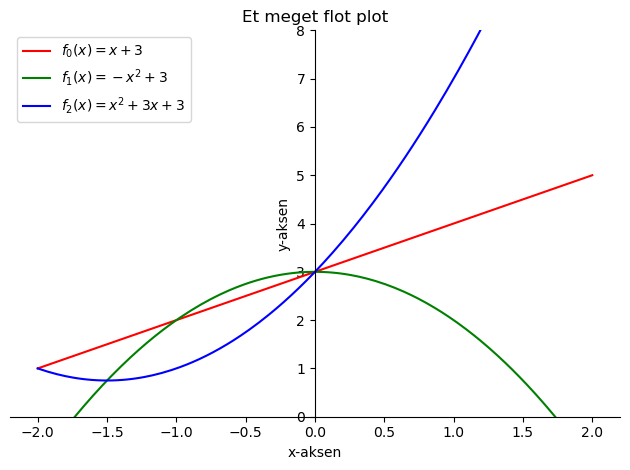

In [13]:
p = plot(x+3,-x**2+3,x**2+3*x+3, (x,-2,2), show=False)
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'blue'
p.xlabel = "x-aksen"
p.ylabel = "y-aksen"
p.title = "Et meget flot plot"
p[0].label = '$f_0(x)=x+3$'
p[1].label = '$f_1(x)=-x^2+3$'
p[2].label = '$f_2(x)=x^2+3x+3$'
p.legend = True
p.ylim = (0,8)
p.show()

Dog netop plots kommer tilbage i stor stil i løbet af disse Demoer senere i løbet af mat 1.

## Ekstra noter

Til sidst her gives et par ekstra fingerpeg til hvordan oplevelsen med SymPy bliver lettere og bedre.

### Markdown og Code

Som det allerede er vist her, findes to forskellige modes i en Jupyter Notebook, som man kan skrive i: "Markdown" og "Code". Når man befinder sig i et Code felt, arbejder man i Python. Man kan indsætte lige så mange linjer man vil i en boks. Hvis man til sidst i boksen skriver en linje med en variabel eller et udtryk, bliver dette printet lige under i pænt format,

In [14]:
y = Symbol('y', complex=True)
sqrt(y**2+2)

   ________
  ╱  2     
╲╱  y  + 2 

og hvis man i sidste linje skriver flere ting adskildt af komma, bliver der printet flere ting pænt som ses her:

In [15]:
udtryk = sqrt(y**2+2)
udtryk, udtryk.subs({y:2/3}) <= 1.6

⎛   ________      ⎞
⎜  ╱  2           ⎟
⎝╲╱  y  + 2 , True⎠

Man kører en boks med enten $\text{Ctrl+Enter}$ eller $\text{Shift+Enter}$.

Det er vigtigt at vide, at alle linjer der er blevet kørt er "husket" i alle bokse der køres efterfølgende. Dette er uanset hvilken rækkefølge man kører boksende i! Dette betyder, at man nogle gange hvis man kører tidligere bokse, ikke får det samme resultat som tidligere. Eksempelvis, 

In [16]:
y ** 2

 2
y 

In [17]:
# Efter at have kørt denne boks, prøv at køre den tidligere boks igen
y = 2

Til sidst er det værd at nævne, at ikke alle kommandoer man kører i Python virker hvis der ikke er en løsning, eller hvis man ikke bruger dem korrekt. Dette kan dog nogle gange være præcis hvad man ønsker at vise! Eksempelvis kan et symbol ikke transponeres,

### Gode fifs

**Restart**: Hvis du vil have Python til at glemme alle gemte variable, fx at $y$ er tildelt værdien 2, skal du genstarte kernen (restart kernel) i "main Notebook Editor toolbar" i VS Code lige over editoren. "Clear Outputs of All Cells" i samme bar fjerner alle outputs, men glemmer ikke værdien af fx variable. 

**Shortcuts**: Hvis man bruger Visual Studio Code *skal* man kende til shortcuttet "$\text{Ctrl+Shift+P}$" ("⇧⌘P" på mac). Dette åbner søgefunktionen efter kommandoer. Så hvis man gerne vil lave en ny celle, køre sit dokument, eller lave en ny fil, kan man søge efter kommandoen. Hvis man så tænker at man kommer til at bruge den fremover, kan mansuper hurtigt tilføje sit egen shortcut, så man selv kan huske det fremover.

Shortcuts som vi har fundet ekstra brugbare i løbet af at lave disse Demoer er:

- Lave nye bokse (*insert cell below*)
- Ændre en boks fra Code til Markdown (*change cell to code* og *change cell to markdown*)
- Genstarte notebook og kør alle bokse fra toppen og ned (*restart the kernel, then re-run the whole notebook*)

**Latex**: I disse Jupyter Notebooks, vil der være eksempler på pæn matematik mellem tekstlinjer. Dette er $\text{LaTeX}$ kode, og kan bruges til at opskrive flotte matematiske udtryk til opgaver og afleveringer. Hvis matematikken skal være *inline* med teksten, skal koden omringes af dollartegn (\$ \$), og hvis den skal skrives som ligning (centreret), kan man i en ny linje skrive "\\ $\text{\\begin\{equation\}}$" før matematikken og "\\ $\text{\\end\{equation\}}$" efter.

**Funktioner**: Python er et stort værktøj, hvor kun en del af det er krævet for at komme igennem kurset. Dog kan store dele af Python gøre ting lettere, hvis man kender til dem. Et eksempel på dette er Python funktioner. Hvis en serie af steps skal laves for at løse en opgave, og den samme opgave gentager sig med forskellige tal, er det oplagt at lave en funktion i Python. Dette er også understøttet gennem SymPy, og eksempler herpå kommer også i løbet af disse Demoer. Altså, hvis der ikke allerede findes en funktion til at løse dit problem, kan du bygge din egen funktion!

## Sidste noter

Vi har forsøgt vores allerbedste for at oplevelsen med SymPy bliver så god som overhovedet muligt i kurset 01005, matematik 1. Dog er det stadig en prøveordning, hvorfor vi stadig forsøger at forbedre både oplevelsen og mulighederne med SymPy. Derfor, hvis I finder fejl, bedre eksempler eller forbedringsforslag til disse demoer, tager vi imod forslag med åbne arme. Forslag er velkomne hos jeres nærmeste klasselærer eller pr. mail til $\text{s194042@student.dtu.dk}$ eller $\text{s194345@student.dtu.dk}$.

Alt held og lykke med SymPy, og alt held og lykke med 01005, Matematik 1!